<a href="https://www.kaggle.com/code/sady36/eda-dataset?scriptVersionId=111201886" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
data = pd.read_csv("/kaggle/input/ecommerce-fashion-dataset/FashionDataset.csv")
data.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [3]:
data.shape

(30758, 8)

# Delete useless column: "Unnamed: 0", and replace "Nan"(str obj) to np.nan obj

In [4]:
data.replace("Nan", np.nan, inplace = True)
data.drop(axis = 1, labels = ["Unnamed: 0"], inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  29575 non-null  object
 1   Deatils    29575 non-null  object
 2   Sizes      23257 non-null  object
 3   MRP        22550 non-null  object
 4   SellPrice  29575 non-null  object
 5   Discount   22550 non-null  object
 6   Category   30758 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


# Format some columns 

In [6]:
data["Discount"] = data["Discount"].apply(lambda x: int(x[:-5]) if not pd.isna(x) else x) # remove "% off" and to int
data["MRP"] = data["MRP"].apply(lambda x: int(x[3:]) if not pd.isna(x) else x) #remove "Rs\n" and to int
data["Sizes"] = data["Sizes"].apply(lambda x: x[5:] if not pd.isna(x) else x) # Remove "Size:"

data["SellPrice"] = data["SellPrice"].astype(float)

# Add a new column that shows how many clothes this brand has

In [7]:
count_brands = data["BrandName"].value_counts()
# add a col with brand's number of products
data["BrandN"] = data["BrandName"].apply(lambda x: count_brands[x] if not pd.isna(x) else np.nan) 

In [8]:
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category,BrandN
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699.0,849.0,50.0,Westernwear-Women,628.0
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499.0,2449.0,30.0,Westernwear-Women,391.0
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199.0,599.0,50.0,Westernwear-Women,300.0
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299.0,1379.0,40.0,Westernwear-Women,918.0
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699.0,849.0,50.0,Westernwear-Women,628.0


# Check for outliers

<AxesSubplot:xlabel='SellPrice'>

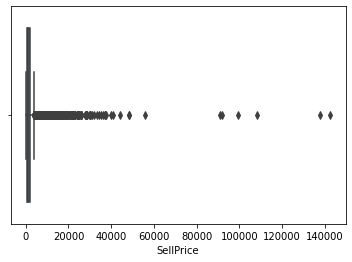

In [9]:
sns.boxplot(x = data["SellPrice"])

# Now we have seen that there are a lot of outliers

## Detect outliers using IQR method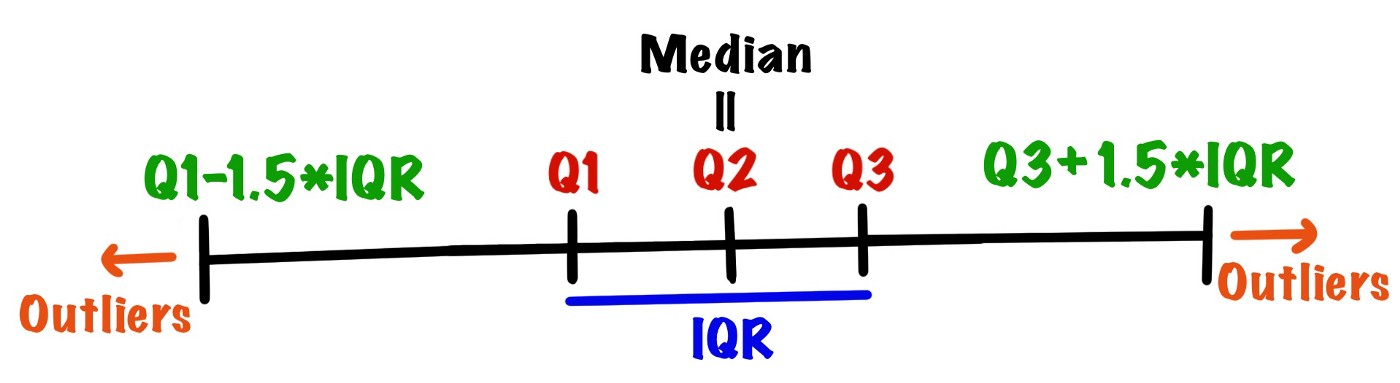

In [10]:
def min_max(dt):
    q1 = dt.quantile(0.25)
    q3 = dt.quantile(0.75)
    iqr = q3 - q1
    mn = q1 - 1.5 * iqr # min value
    mx = q3 + 1.5 * iqr # max value
    return mn, mx

# Save new dataset without outliers

In [11]:
mn, mx = min_max(data["SellPrice"])
no_price_outliers = data[(data["SellPrice"] > mn) & (data["SellPrice"] < mx)]

# **Visualize**

In [12]:
sns.set_theme(style = "whitegrid", font_scale = 1.75)
sns.set_theme()

# We can see that correlation is only between MRP and SellPrice

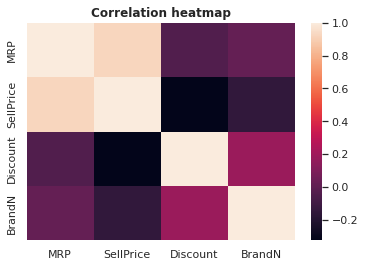

In [13]:
p = sns.heatmap(data.corr())
p.set_title("Correlation heatmap", weight = "bold")
plt.show()

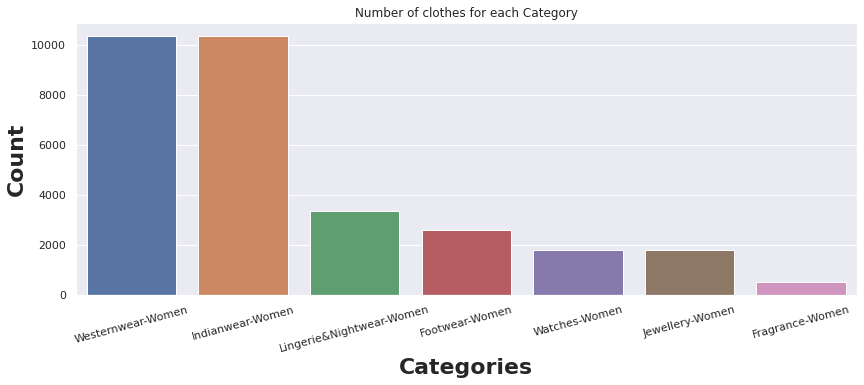

In [14]:
plt.figure(figsize = (14, 5))
plt.xticks(rotation=15)
cat_order = data["Category"].value_counts().index
p = sns.countplot(data = data, x = "Category", order = cat_order)
p.set(title = "Number of clothes for each Category")
p.set_xlabel("Categories", fontsize = 22, weight = "bold")
p.set_ylabel("Count", fontsize = 22, weight = "bold")
plt.show()

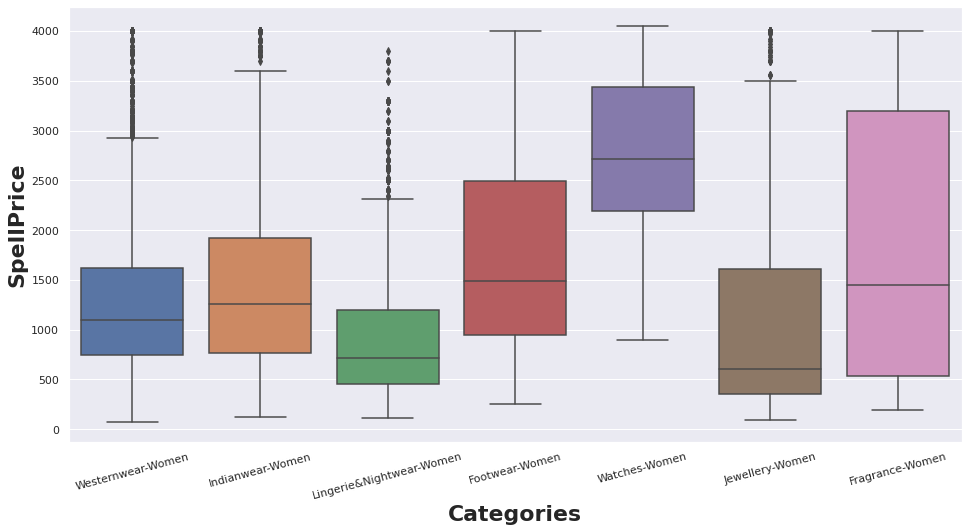

In [15]:
q = data["SellPrice"].quantile(0.9)
withou_outliers = data[data["SellPrice"] < q]
plt.figure(figsize = (16, 8))
plt.xticks(rotation=15)
p = sns.boxplot(data = no_price_outliers, y = "SellPrice", x = "Category", order = cat_order)
p.set_xlabel("Categories", fontsize = 22, weight = "bold")
p.set_ylabel("SpellPrice", fontsize = 22, weight = "bold")
plt.show()

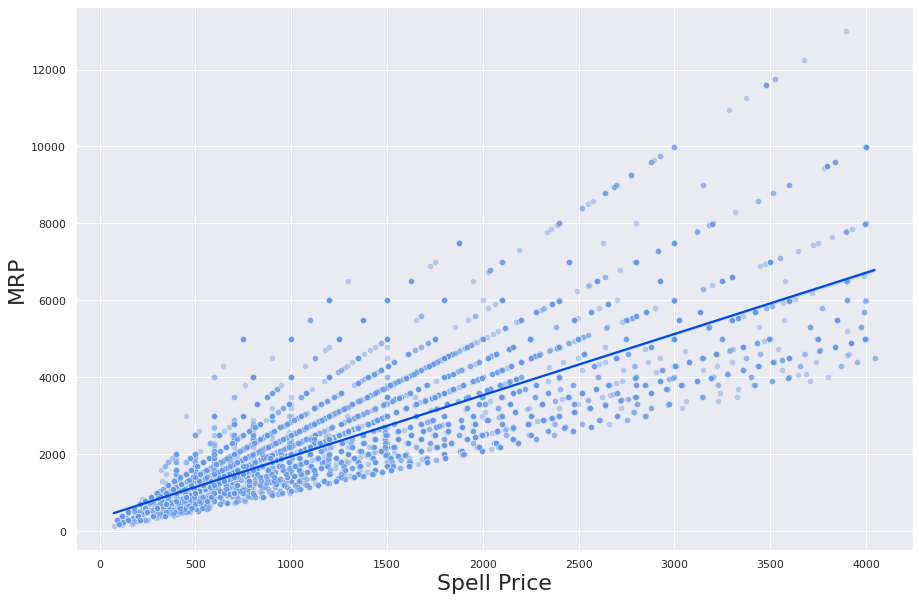

In [16]:
plt.figure(figsize = (15, 10))
p = sns.regplot(data = no_price_outliers, x = "SellPrice", y = "MRP", scatter = False, color = (0, 0.3, 0.88))
p = sns.scatterplot(data = no_price_outliers, x = "SellPrice", y = "MRP", alpha = 0.4, color = (0.4, 0.6, 0.9))
p.set_xlabel("Spell Price", fontsize = 22)
p.set_ylabel("MRP", fontsize = 22)
plt.show()

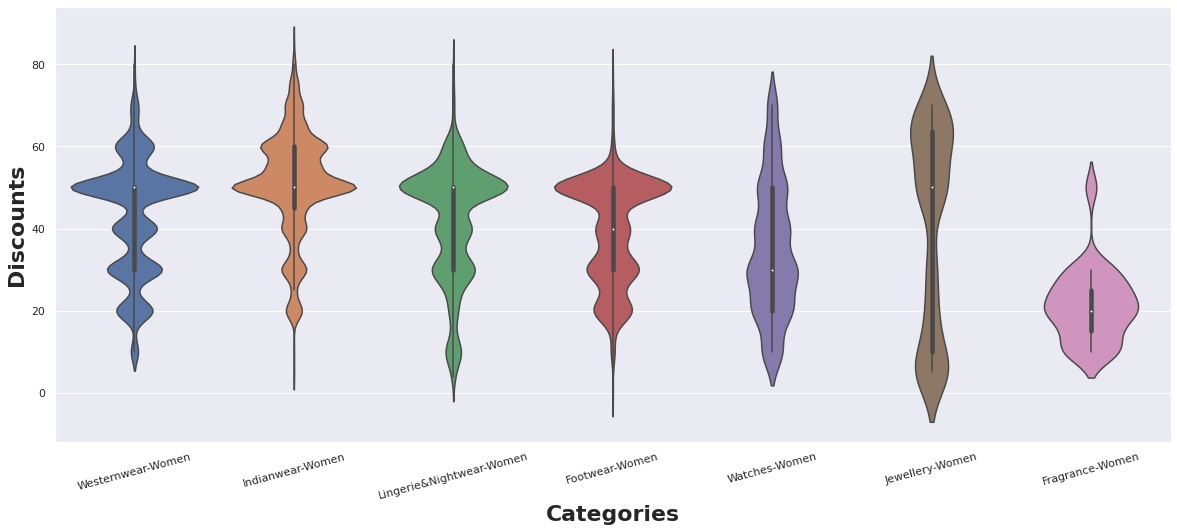

In [17]:
plt.figure(figsize = (20, 8))
plt.xticks(rotation = 15)
p = sns.violinplot(data = data, y = "Discount", x = "Category", order = cat_order)
p.set_xlabel("Categories", fontsize = 22, weight = "bold")
p.set_ylabel("Discounts", fontsize = 22, weight = "bold")
plt.show()

Check prices boxplot for categories with outliers

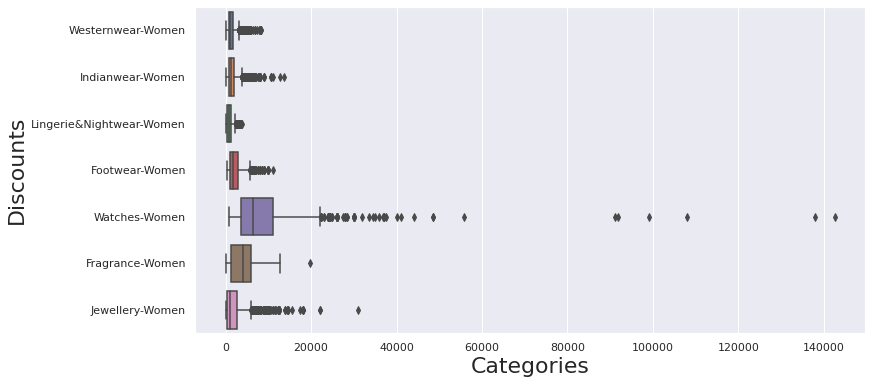

In [18]:
plt.figure(figsize = (12, 6))
p = sns.boxplot(data = data, y = "Category", x = "SellPrice")
p.set_xlabel("Categories", fontsize = 22)
p.set_ylabel("Discounts", fontsize = 22)
plt.show()

# Now we see that most of outliers and the biggest ones occures in the "Watches-Women" category 

In [19]:
watches = data[data["Category"] == "Watches-Women"]

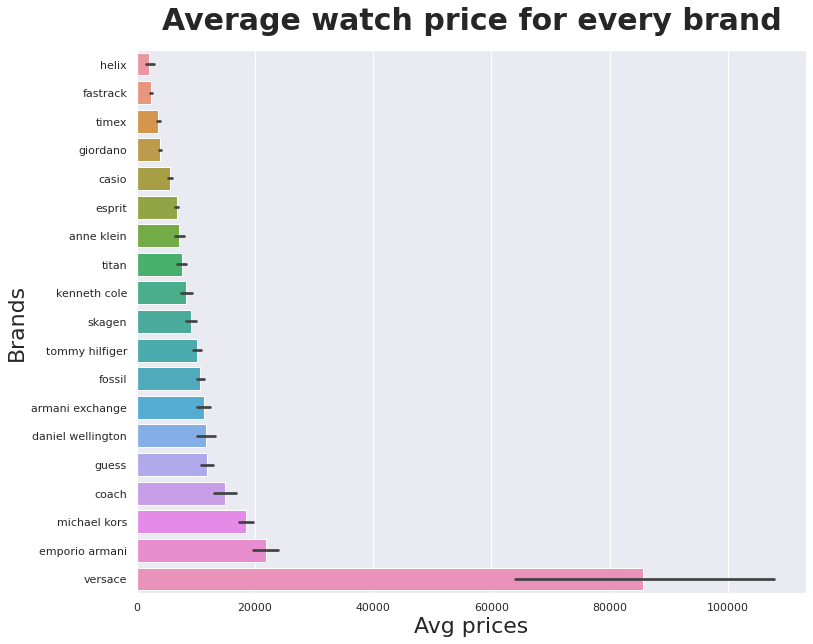

In [20]:
popular = watches[watches.BrandN > 25] # Select only brands with more than 25 watches
plt.figure(figsize = (12, 10))
order = popular.groupby(by = "BrandName").mean()["SellPrice"].sort_values().index
p = sns.barplot(data = popular, y = "BrandName", x = "SellPrice", order = order)
p.set_xlabel("Avg prices", fontsize = 22)
p.set_ylabel("Brands", fontsize = 22)
p.set_title("Average watch price for every brand", fontsize = 30, weight = "bold", pad = 20)
plt.show()

# Creating WordCloud for "Sizes"

In [21]:
sizes = " ".join(data["Sizes"].dropna())
wd_cloud1 = WordCloud(
    collocations = False, background_color = "white", 
    width = 1920, height = 1080).generate(sizes)

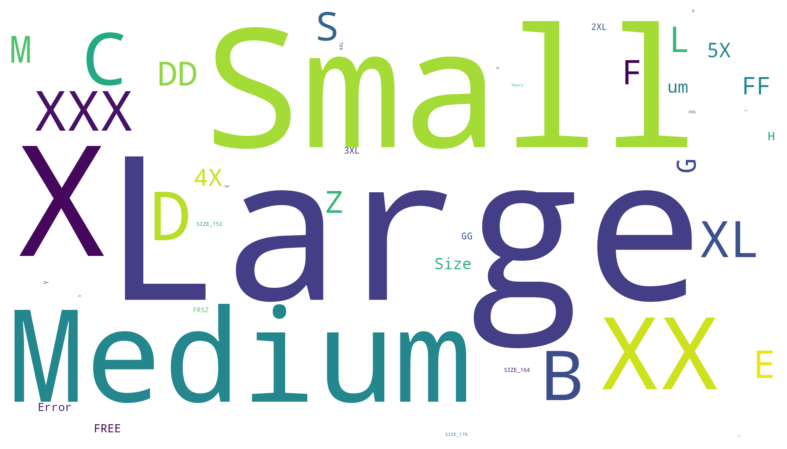

In [22]:
plt.figure(figsize = (20, 8))
plt.axis("off")
plt.imshow(wd_cloud1, interpolation="bilinear")
plt.show()

# Now creating WordCloud for "Deatails, but we will remove a word "women" as it is obvious that it will appear the most

In [23]:
details = "".join(data["Deatils"].dropna()).replace("women", "")
wd_cloud2 = WordCloud(
    collocations = False, background_color = "white",
    width = 1920, height = 1080).generate(details)

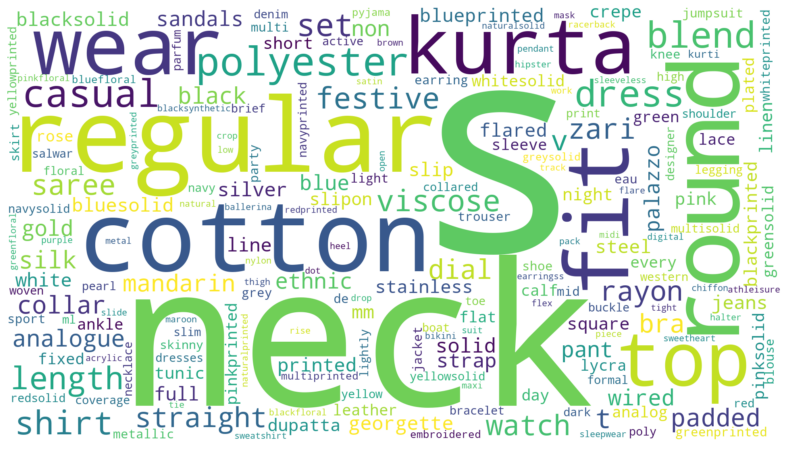

In [24]:
plt.figure(figsize = (20, 8))
plt.axis("off")
plt.imshow(wd_cloud2, interpolation="bilinear")
plt.show()